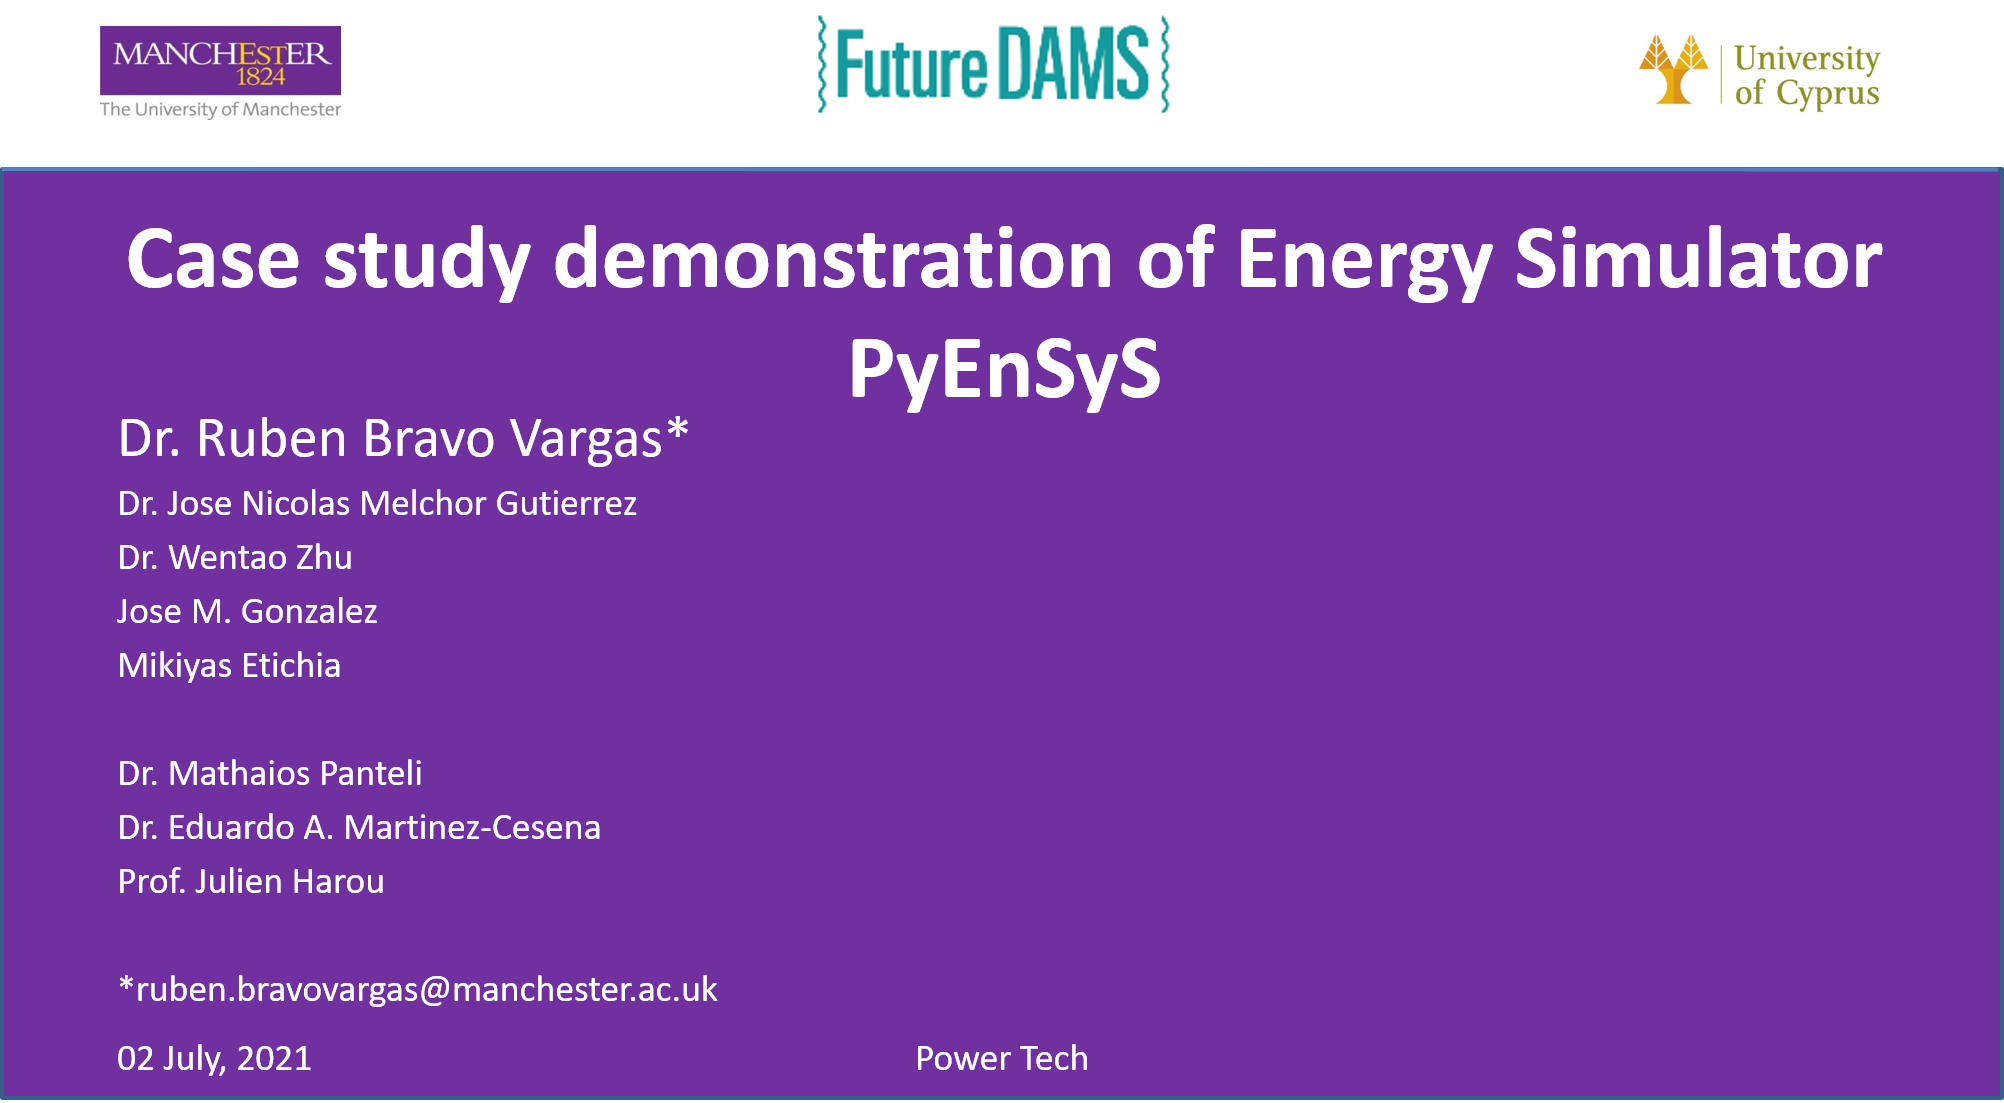

In [12]:
from IPython.display import Image
Image("diagrams\Title_.png", width=1000)

# PyEnSyS


## Iraq case study demonstration using Jupyter Notebook 

### Input data:

Power network data from:
* Afaneen Anwer and Mizher Nazar, Optimal Load Shedding of Iraqi Power System using Frequency and Voltage Sensitivities Method https://inpressco.com/wp-content/uploads/2019/02/Paper1496-104.pdf

Power demand data from:
* https://www.moelc.gov.iq/home?lang=en

Weather data from:
* https://www.renewables.ninja/

Solar and wind maps from:
* https://globalsolaratlas.info/map
* https://globalwindatlas.info/

Future DAMS online tool:
* https://hydra.org.uk/

### Importing tools and packages

In [5]:
# installing and importing tools and packages

from pyensys.engines import main
import os
import sys
import subprocess
import pkg_resources

required = {'pyensys'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)


import matplotlib.pyplot as plt
import numpy as np

<br>
<br>
<br>
<br>

# Diagram of 400 kV Iraqi transmission network:
<br>

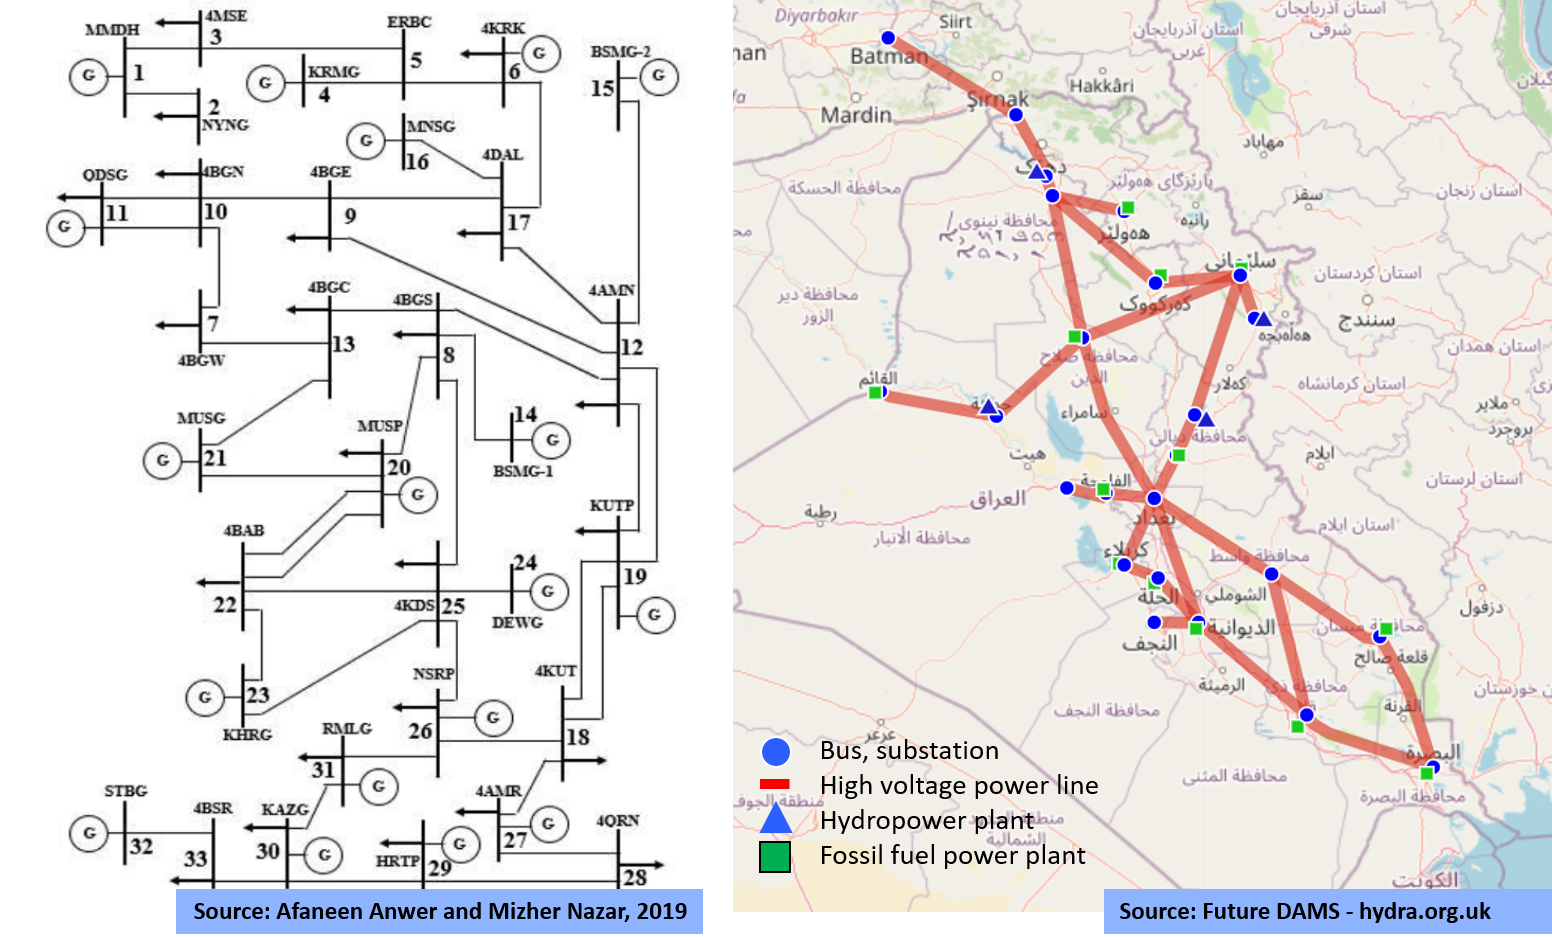

In [6]:
Image("diagrams\Iraq_power_network.png", width=1000)

<br>
<br>
<br>
<br>

# Estimating the power output from solar and wind:

## Weather data from renewables ninja: https://www.renewables.ninja/

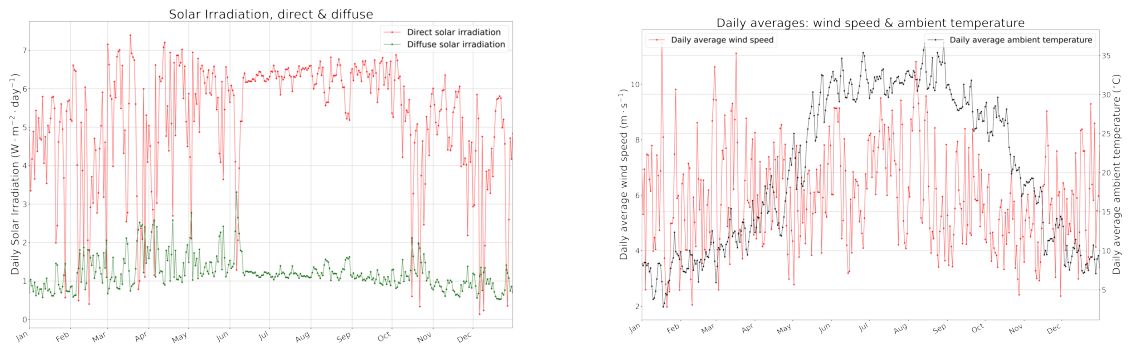

In [37]:
import matplotlib.pyplot as plt
img1 = plt.imread('diagrams\Diagram_solar_irradiation.png')
img2 = plt.imread('diagrams\Diagram_wind_n_temp.png')

f, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].imshow(img1)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].axis('off')
plt.plot()
plt.show()

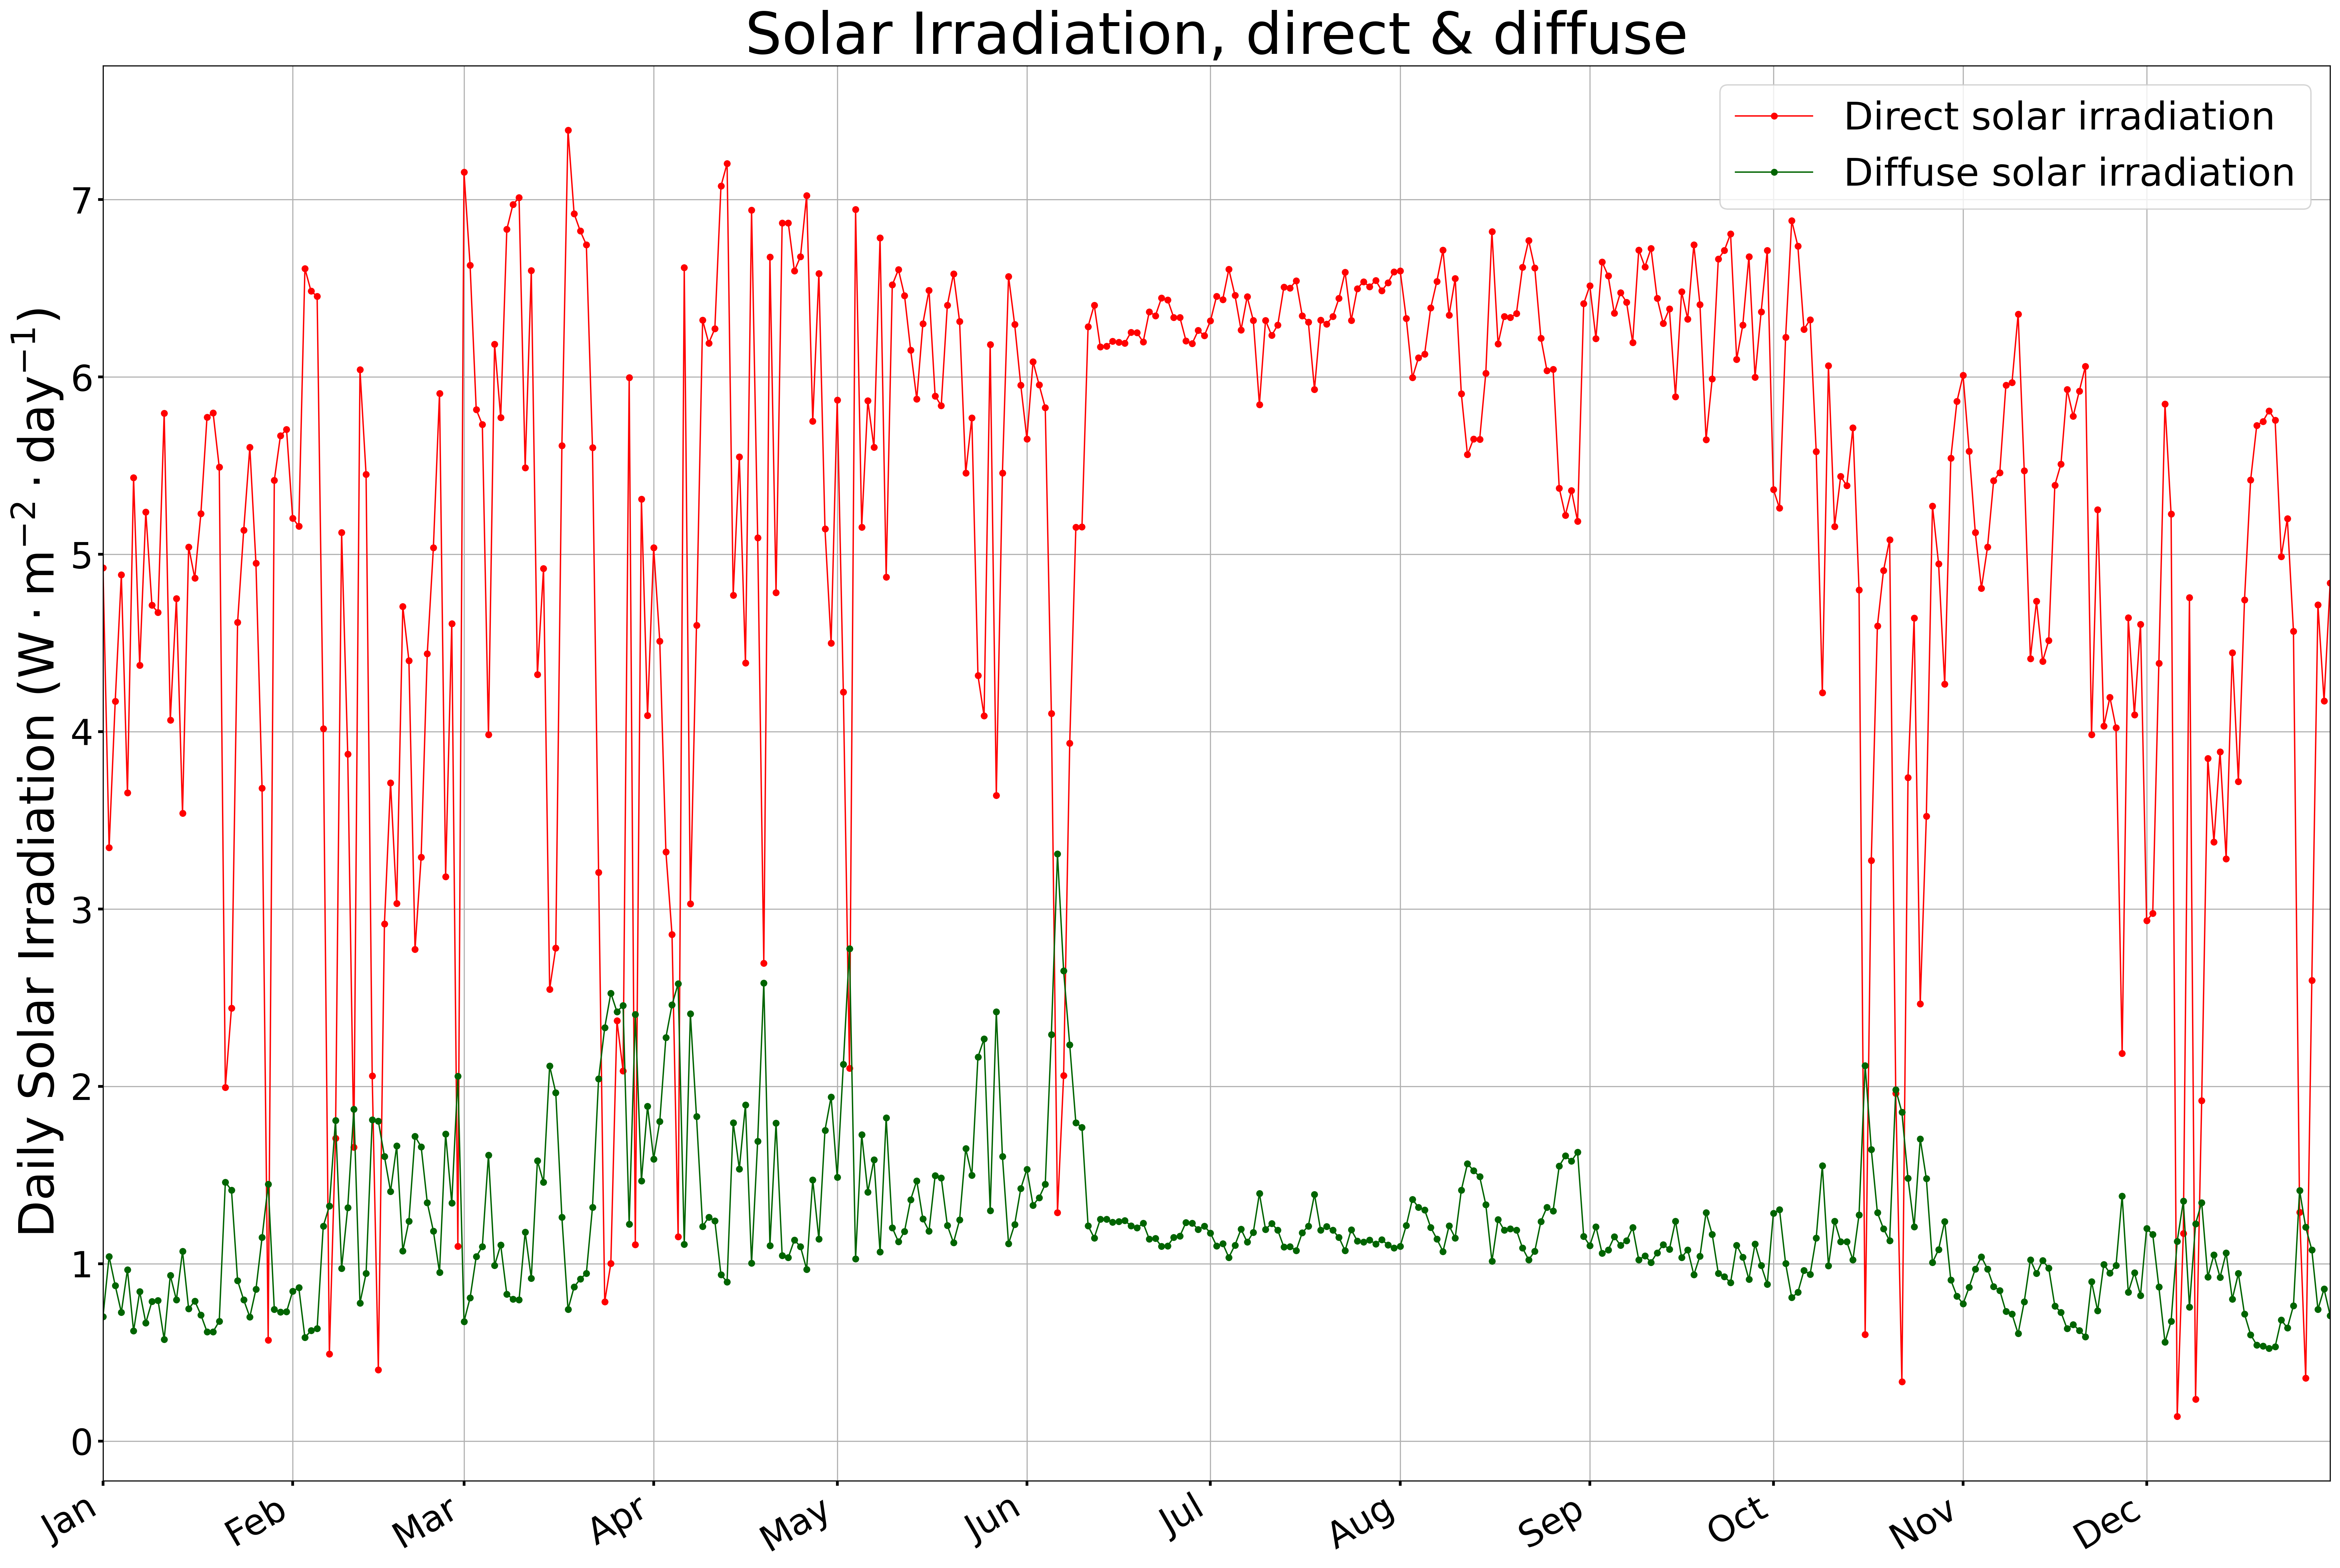

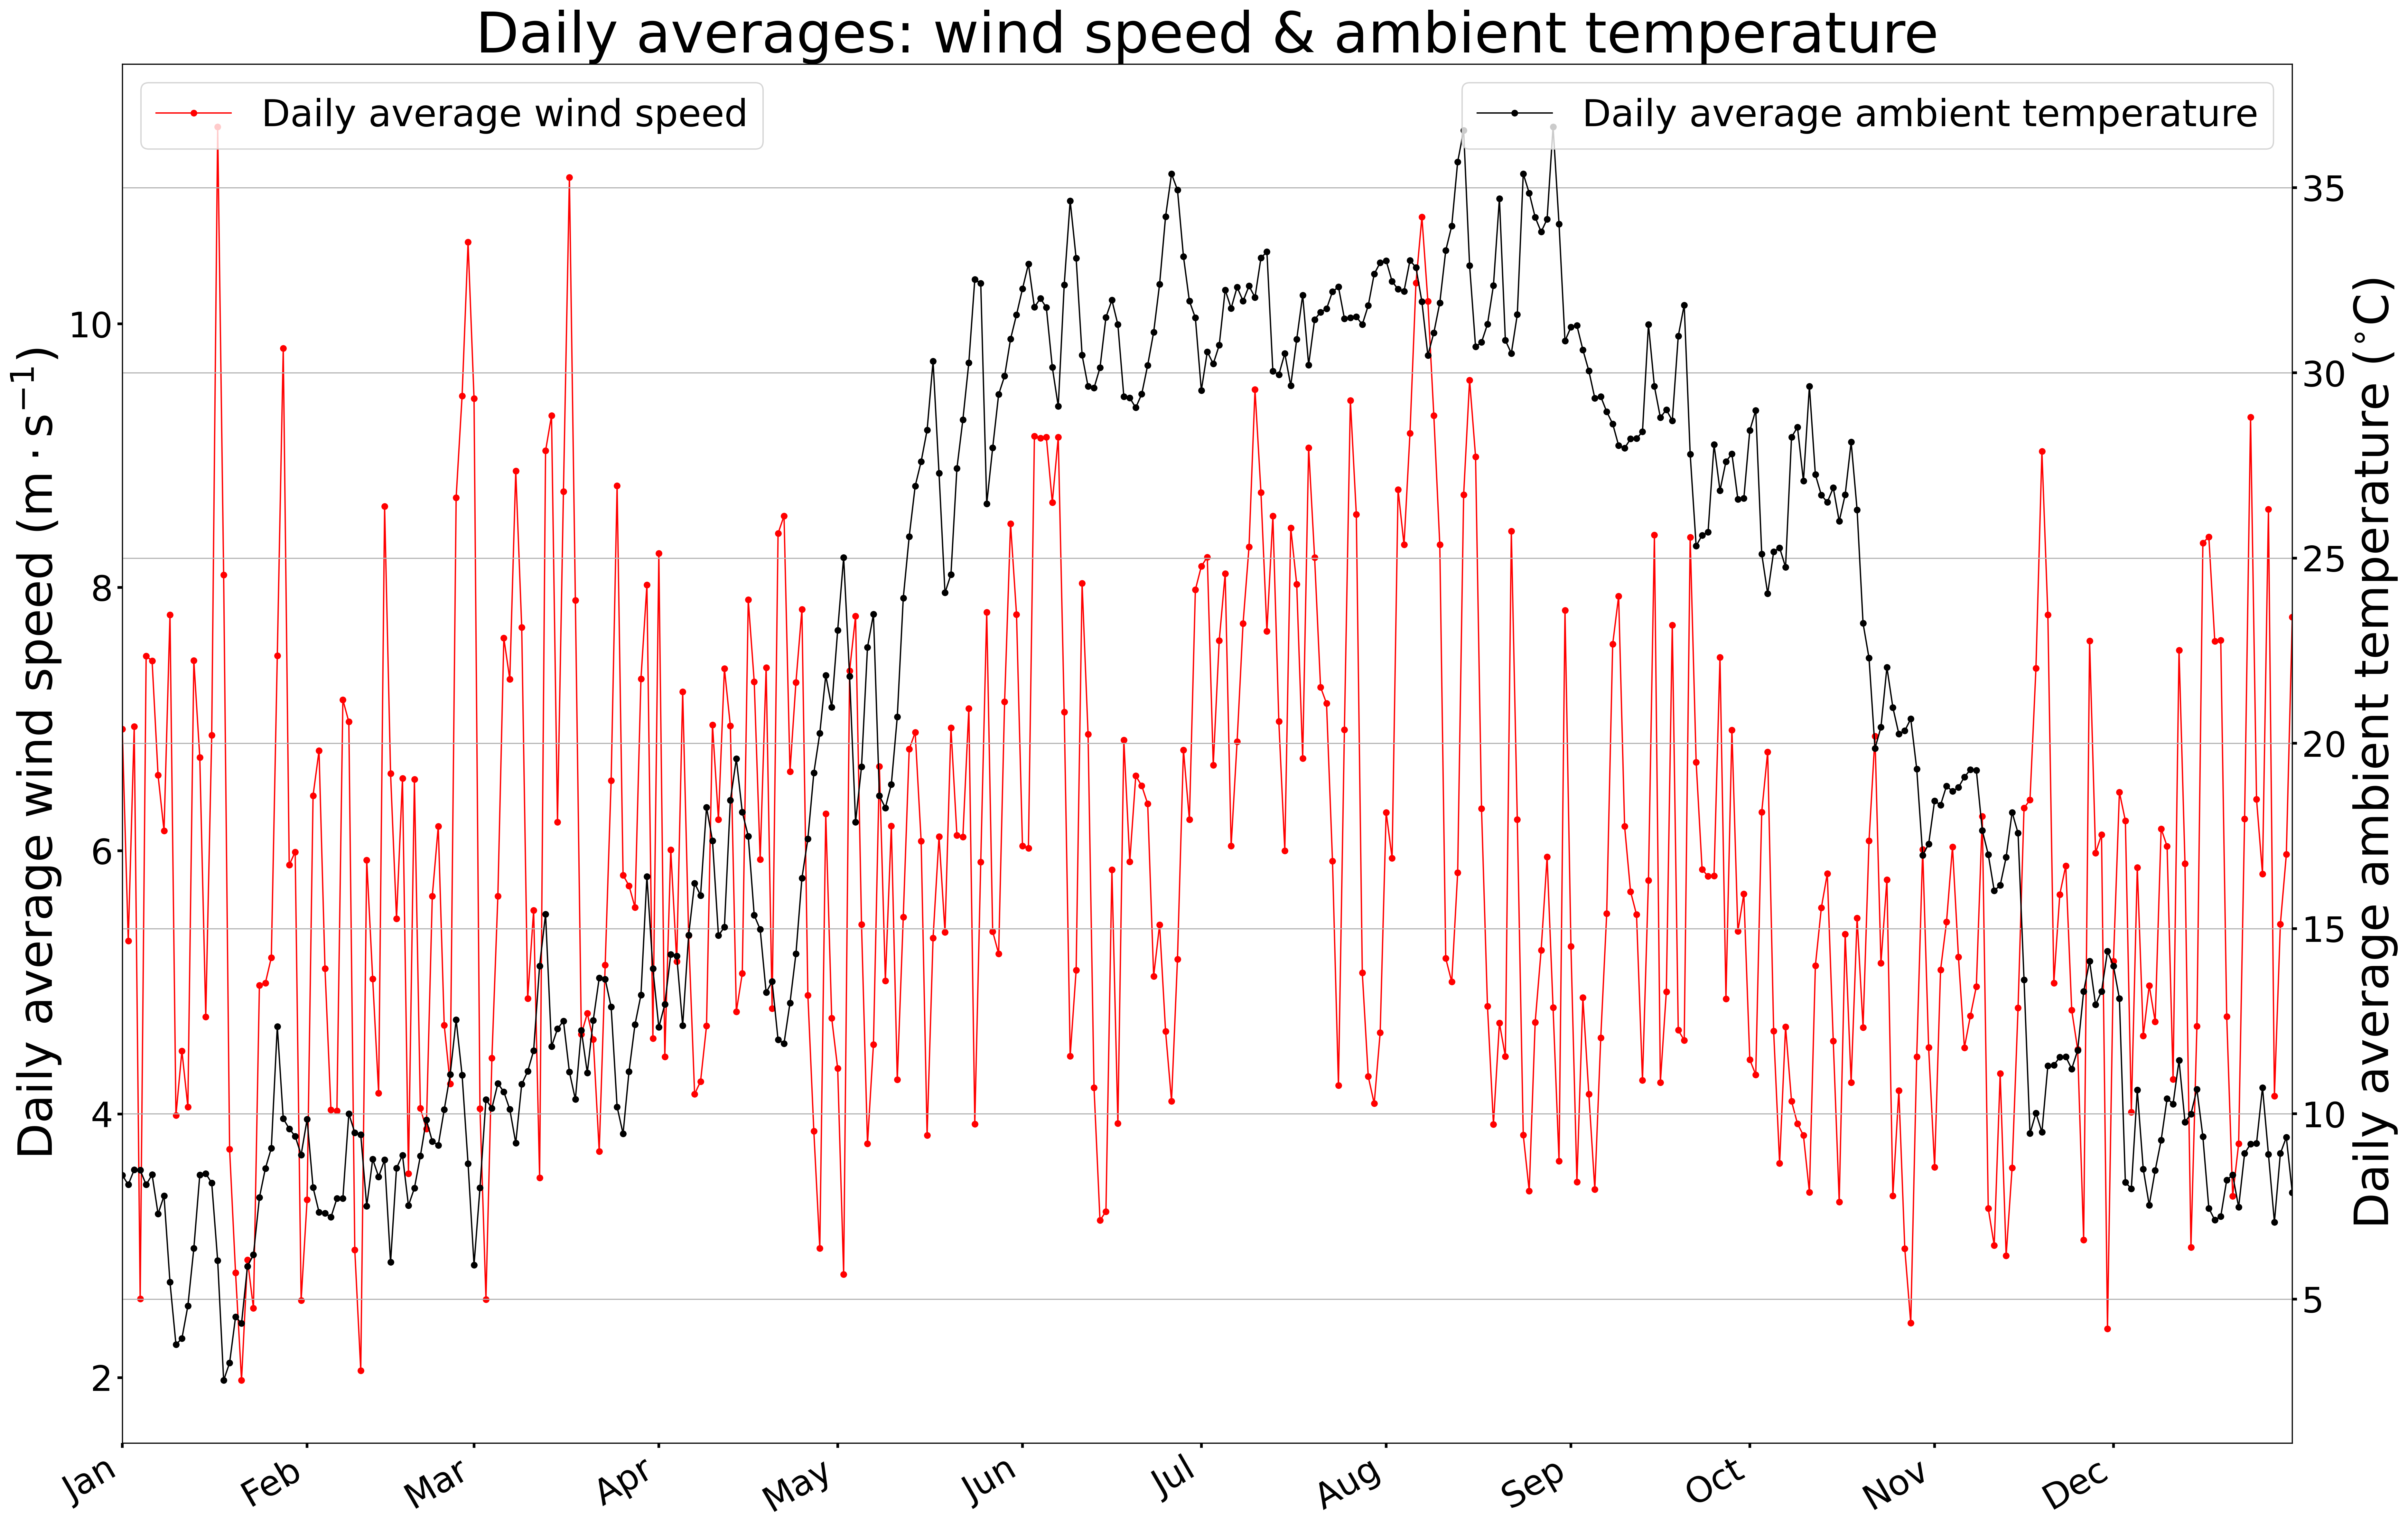

In [17]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='diagrams\Diagram_solar_irradiation.png') 
y = Image(filename='diagrams\Diagram_wind_n_temp.png') 
display(x, y)

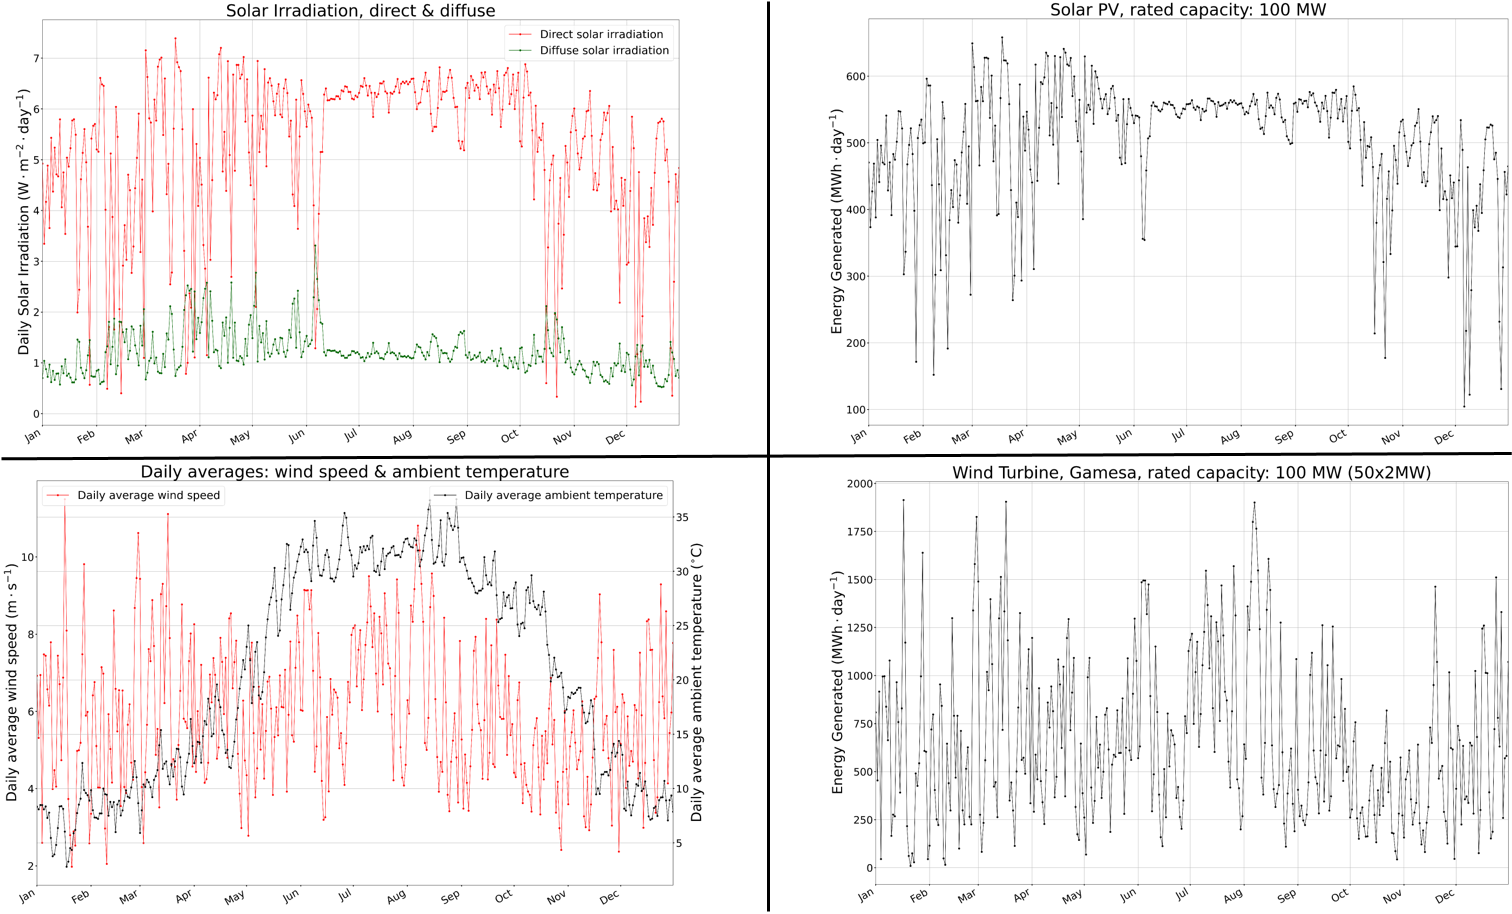

In [7]:
Image("diagrams\weather.png", width=1000)

<br>
<br>
<br>
<br>

# Runing the model:
<br>

In [8]:
file_name = 'Iraq.xlsx'

path = os.getcwd()
os.chdir(path)
path = os.path.abspath(file_name)

#path = os.path.abspath("path\\Power_Tech\\Iraq.xlsx")
opt = main.pyeneClass()
time=1.0
for i in range(1):
    time = time + i
    opt.initialise(path=path)
    subscripts = {"pt" : [["week", "weekday"], "v_string"],"hour" : [time, "double"]}
    opt.run(subscripts=subscripts)
    opt.save_outputs(sim_no=int(i))
    opt.close_output_files()


C:\Python\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'active power generation_week_weekday'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


# Results

## Current system

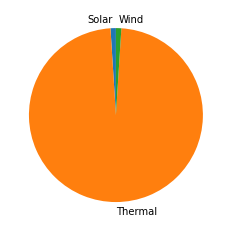

In [9]:
y = np.array([1, 98, 1])
mylabels = ["Solar", "Thermal", "Wind"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

## Integration of 500 MW Solar photovoltaics + 500 MW Wind 

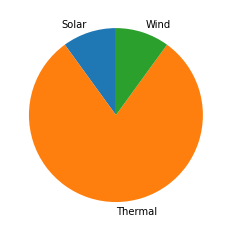

In [10]:
y = np.array([10, 80, 10])
mylabels = ["Solar", "Thermal", "Wind"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

In [46]:
%load_ext watermark
%watermark -v -m -p pyensys,pandas,numpy,watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pyensys  : 0.1
pandas   : 1.1.3
numpy    : 1.19.2
watermark: 2.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

